<a href="https://colab.research.google.com/github/arifkyramadhan/SistemCerdas_Tutorial-TensorFlow-dan-KERAS/blob/main/SistemCerdas_TensorFlow%20dan%20KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Aditya Rifky Ramadhan

NIM: 2101201036

Pada tutorial ini akan menggunakan Deep-Learning untuk memprediksi nilai Cosinus hyperbolic dari suatu bilangan

y=F(x)=Cosh(x)

Langkah pertama ialah mempersiapkan server untuk tensorflow dan keras

In [51]:
#menentukan paths ke model filenya
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

#melakukan instalasi tensorflow
! pip install tensorflow==2.4.0rc0

import tensorflow as tf 

from tensorflow import keras #keras adalah High-levelnya API TensorFlow pada deep learning
import numpy as np #numpy adalah library matematika
import pandas as pd #pandas adalah library data manipulation

import matplotlib.pyplot as plt #matplotlib adalah library grafik
import math #math adalah library untuk matematika pada python

#set seed untuk eksperimen
seed = 1
np.random.seed(seed)

Langkah kedua yaitu membuat fungsi cosinus hyperbolic dan membuat data-datanya (X,cosh(X)) sebanyak 1500 sample kemudian memunculkan data cosinus hyperbolicnya

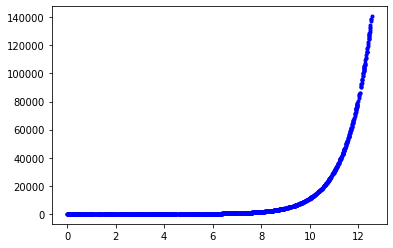

In [52]:
SAMPLES = 1500
x_values = np.random.uniform(
    low=0, high=4*math.pi, size=SAMPLES).astype(np.float32)
np.random.shuffle(x_values)
y_values = np.cosh(x_values).astype(np.float32) #cosinus hyperbolic
plt.plot(x_values, y_values, 'b.')
plt.show()

Langkah ketiga yaitu membuat data cosinus hyperbolic menjadi acak agar saat Deep-Learning akan memprediksi hasil yang bagusnya seperti apa. Dan memunculkannya pada grafik 

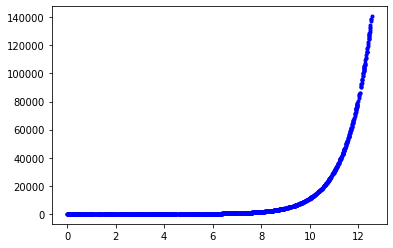

In [53]:
y_values += 0.1 * np.random.randn(*y_values.shape)

plt.plot(x_values, y_values, 'b.')
plt.show()

Langkah keempat yaitu membuat data trainningnya (50%), data validasinya (25%), dan data testnya (25%)

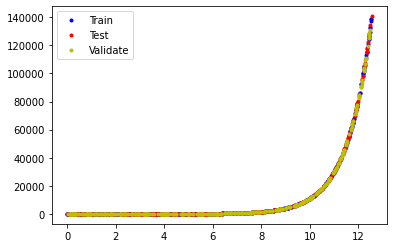

In [54]:
TRAIN_SPLIT = int(0.5 * SAMPLES)
TEST_SPLIT = int(0.25 * SAMPLES + TRAIN_SPLIT)

x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()

Kemudian langkah kelima yaitu membuat model deep-learning menggunakan KERAS dan mentrainningnya

In [55]:
model_1 = tf.keras.Sequential()
model_1.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))
model_1.add(keras.layers.Dense(1))
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_validate, y_validate))


Epoch 1/500
12/12 [==============================] - 0s 15ms/step - loss: 740644578.4615 - mae: 11017.7499 - val_loss: 890476416.0000 - val_mae: 13003.9062
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 730287576.6154 - mae: 10491.0186 - val_loss: 890461120.0000 - val_mae: 13003.5576
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 834228558.7692 - mae: 11058.6967 - val_loss: 890445568.0000 - val_mae: 13003.2051
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 629508635.0769 - mae: 9651.8839 - val_loss: 890430528.0000 - val_mae: 13002.8691
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 713294665.8462 - mae: 9882.2427 - val_loss: 890415168.0000 - val_mae: 13002.5244
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 646765316.9231 - mae: 9711.3768 - val_loss: 890401024.0000 - val_mae: 13002.2041
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss:

Kemudian, melihat grafik error hasil trainningnya 

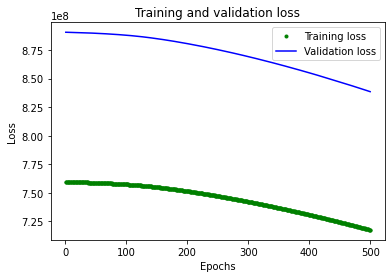

In [56]:
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Kemudan melihat hasil trainningnya dari sisi lain

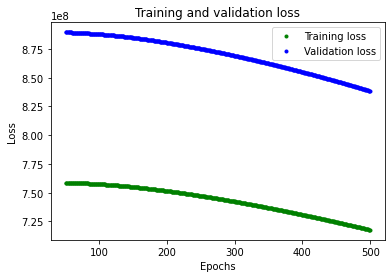

In [57]:
SKIP = 50
plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Langkah selanjutnya yaitu melihat laporan trainning dari sisi Mean Absolute Error

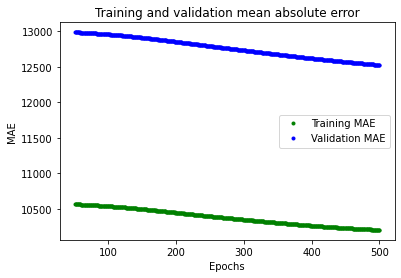

In [58]:
plt.clf()

train_mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


Setelah trainning selesai, selanjutnya yaitu evaluasi dengan data test dan melihat hasilnya.

12/12 [==============================] - 0s 1ms/step - loss: 833183488.0000 - mae: 12081.0146


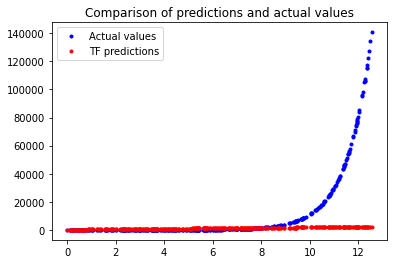

In [59]:
test_loss, test_mae = model_1.evaluate(x_test, y_test)

y_test_pred = model_1.predict(x_test)

plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()

Langkah terakhir yaitu ulangi deep-learning menggunakan KERAS dari membuat model dan mentrainningnya sampai evaluasi dengan data test. Langkah berulang tersebut hingga Actual Values dan TF predictionnya selaras dengan cara mengubah node input dan hidden layernya. Untuk fungsi cosinus hyperbolic inputnya yaitu 12 dan terdapat tiga hidden layer yang masing-masing secara berurutan 24, 36, dan 48. Dan outputnya tetap single neuron dengan 1 node

In [60]:
model = tf.keras.Sequential()

model.add(keras.layers.Dense(11, activation='relu', input_shape=(1,)))
model.add(keras.layers.Dense(22, activation='relu'))
model.add(keras.layers.Dense(33, activation='relu'))
model.add(keras.layers.Dense(44, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss="mse", metrics=["mae"])

history = model.fit(x_train, y_train, epochs=500, batch_size=64,
                    validation_data=(x_validate, y_validate))

model.save(MODEL_TF)


Epoch 1/500
12/12 [==============================] - 1s 17ms/step - loss: 833520802.4615 - mae: 11084.9407 - val_loss: 890453632.0000 - val_mae: 13003.3984
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 573142360.6154 - mae: 8845.9499 - val_loss: 890403840.0000 - val_mae: 13002.2822
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 960247601.2308 - mae: 12241.6444 - val_loss: 890322432.0000 - val_mae: 13000.4570
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 832365843.6923 - mae: 10978.4331 - val_loss: 890188800.0000 - val_mae: 12997.4678
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 848597326.7692 - mae: 11653.2840 - val_loss: 889963584.0000 - val_mae: 12992.6602
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 626618121.8462 - mae: 9262.6064 - val_loss: 889585344.0000 - val_mae: 12985.1064
Epoch 7/500
12/12 [==============================] - 0s 6ms/step - loss

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: models/model/assets


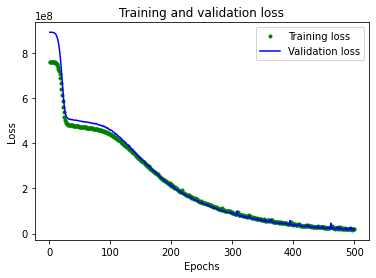

In [61]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

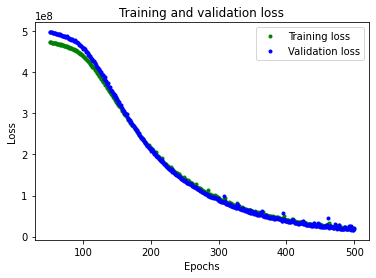

In [62]:
SKIP = 50
plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

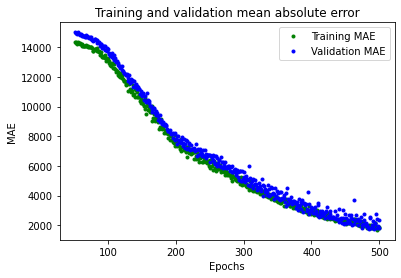

In [63]:
plt.clf()

train_mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

12/12 [==============================] - 0s 1ms/step - loss: 21798920.0000 - mae: 2282.7583


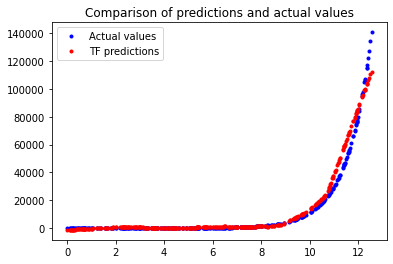

In [64]:
test_loss, test_mae = model.evaluate(x_test, y_test)

y_test_pred = model.predict(x_test)

plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()